#  Практическое задание №2 по ОММ                                   
### Адонин Артем Сергеевич 303 группа
## Задача № 31

# Постановка задачи

Используя метод переменных направлений, решите краевую задачу: 

\begin{equation}
\begin{cases}
\frac{\partial u}{\partial t} = Δu+yt^2, \; 0< x< 1, 0< y< 2,  t> 0\\
\frac{\partial u}{\partial x}|_{x=0} = u|_{x=1}=0, \\
\frac{\partial u}{\partial y}|_{y=0}=\frac{\partial u}{\partial y}|_{y=2}=0,\\
u|_{t=0}=(x^2-1)cos(πy)
\end{cases}
\end{equation}

In [228]:
import numpy as np
import matplotlib.pyplot as plt
Nx=100
Ny=100
M=60
T=20
x = np.linspace(0,1,Nx)
y = np.linspace(0,2,Ny)
t = np.linspace(0,T,M)
h_x= x[1]-x[0]
h_y= y[1]-y[0]
tau= t[1]-t[0]
gamma_x= tau/h_x ** 2
gamma_y= tau/h_y ** 2
u=np.zeros((Nx,Ny,2*M+1))

In [229]:
def F_1(i1,i2,j):
    return 0.5 * gamma_y*(u[i1,i2-1,j-1]+u[i1,i2+1,j-1])+(1-gamma_y)*u[i1,i2,j-1]+ 0.5* tau * y[i2]* (tau*(j+1)/2)*(tau*(j+1)/2)
def F_2(i1,i2,j):
    return 0.5 * gamma_x*(u[i1-1,i2,j-1]+u[i1+1,i2,j-1])+(1-gamma_x)*u[i1,i2,j-1]+ 0.5* tau * y[i2]* (tau*(j-1)/2)*(tau*(j-1)/2)
def progonka_x(i2,j):  #прогонка по х
    d = np.zeros(Nx)
    sigma = np.zeros(Nx)
    d[1]=0 #условие Неймана
    sigma[1]=0 # условие Дирихле
    A = 0.5 * gamma_x
    B = 1 + gamma_x
    C = 0.5 * gamma_x
    for m in range(1,Nx-1):
        Fm= -F_1(m,i2,j)
        d[m+1] = C / (B - A * d[m])
        sigma[m+1]=(Fm - A * sigma[m]) / (A * d[m] - B)
    u[Nx-1,i2,j]=0 #условие Дирихле
    for m in range(Nx-1,0,-1):
        u[m-1,i2,j]= d[m]*u[m,i2,j]+sigma[m]
    

In [230]:
def progonka_y(i1,j): # прогонка по y
    d = np.zeros(Ny)
    sigma = np.zeros(Ny)
    d[1]=1
    sigma[1]=0
    A = 0.5 * gamma_y
    B = 1 + gamma_y
    C = 0.5 * gamma_y
    for m in range(1,Ny-1):
        Fm= -F_2(i1,m,j)
        d[m+1] = C / (B - A * d[m])
        sigma[m+1]=(Fm - A * sigma[m]) / (A * d[m] - B)
    u[i1,Ny-1,j]= sigma[-1]/(1-d[-1])
    for m in range(Ny-1,0,-1):
        u[i1,m-1,j]= d[m]*u[i1,m,j]+sigma[m]
    

In [231]:
u[:,:,0] = np.cos(np.pi*y)*(x**2-1) #начальное условие

In [232]:
for j in range(1,2*M,2): #решение
    for i2 in range(1,Ny-1):
        progonka_x(i2,j)
    for i1 in range(1,Nx-1):
        progonka_y(i1,j+1)

<IPython.core.display.Javascript object>


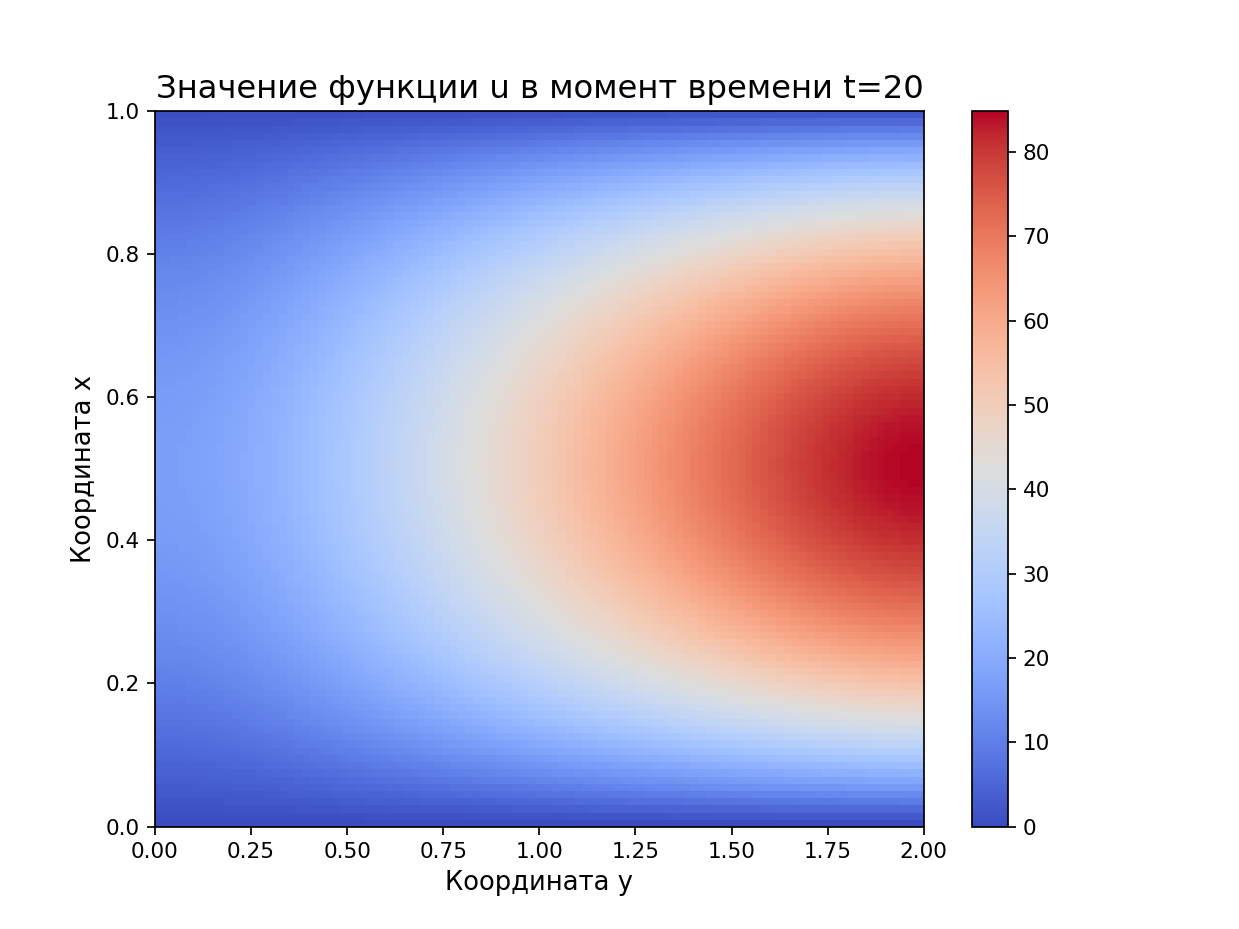

Text(0.5, 1.0, 'Значение функции u в момент времени t=20')

In [233]:
fig = plt.figure(figsize = (8,6))
plt.pcolormesh(y,x,u[:,:,-1],cmap='coolwarm')
plt.colorbar()
plt.ylabel('Координата х',fontsize=12)
plt.xlabel('Координата y',fontsize=12)
plt.title('Значение функции u в момент времени t='+str(T),fontsize=15)

<IPython.core.display.Javascript object>


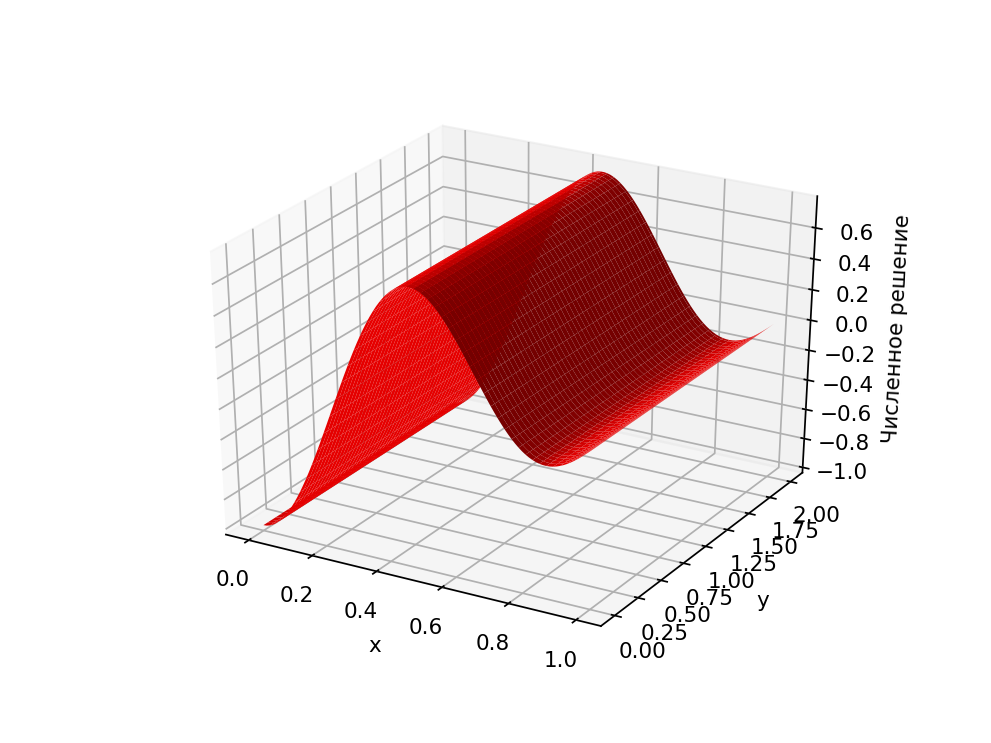

<IPython.core.display.Javascript object>


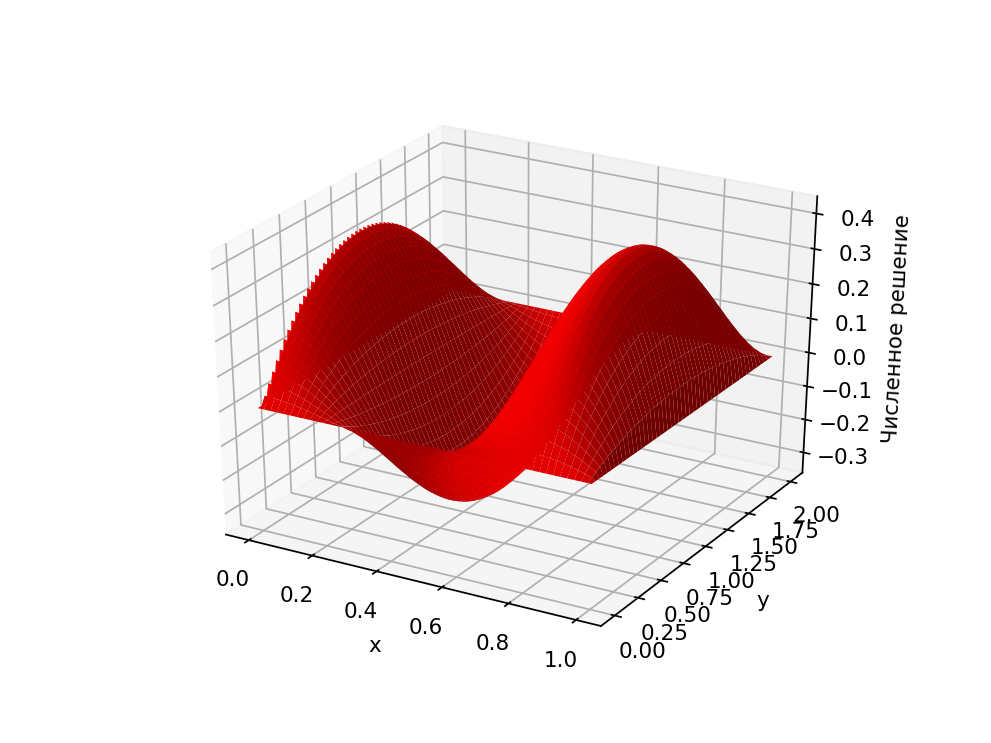

<IPython.core.display.Javascript object>


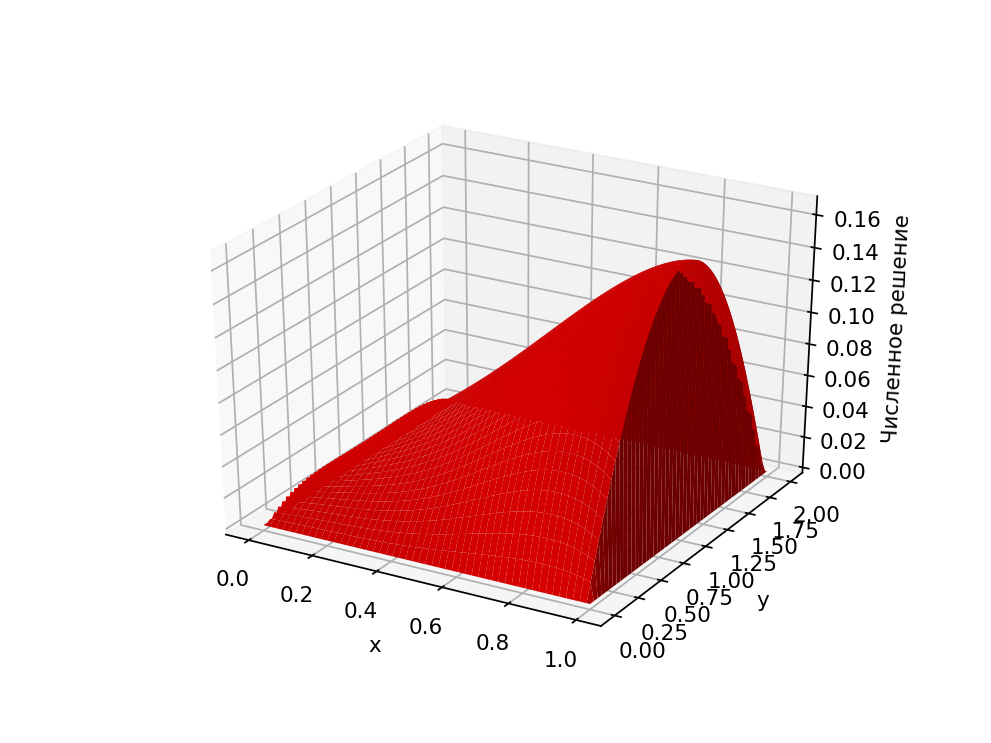

<IPython.core.display.Javascript object>


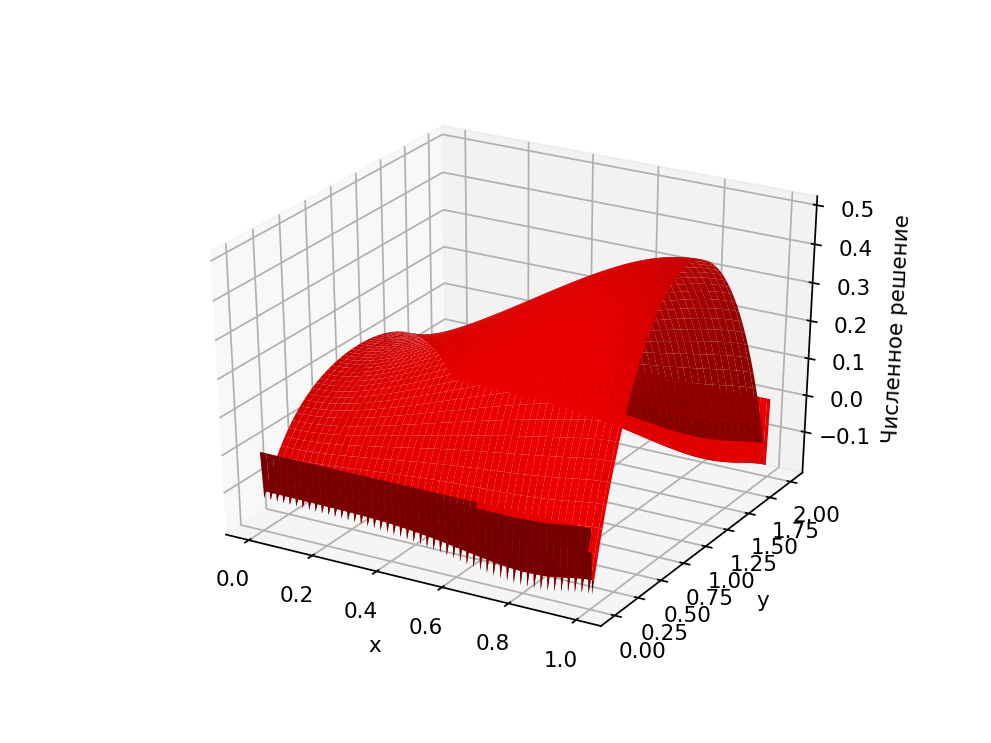

<IPython.core.display.Javascript object>


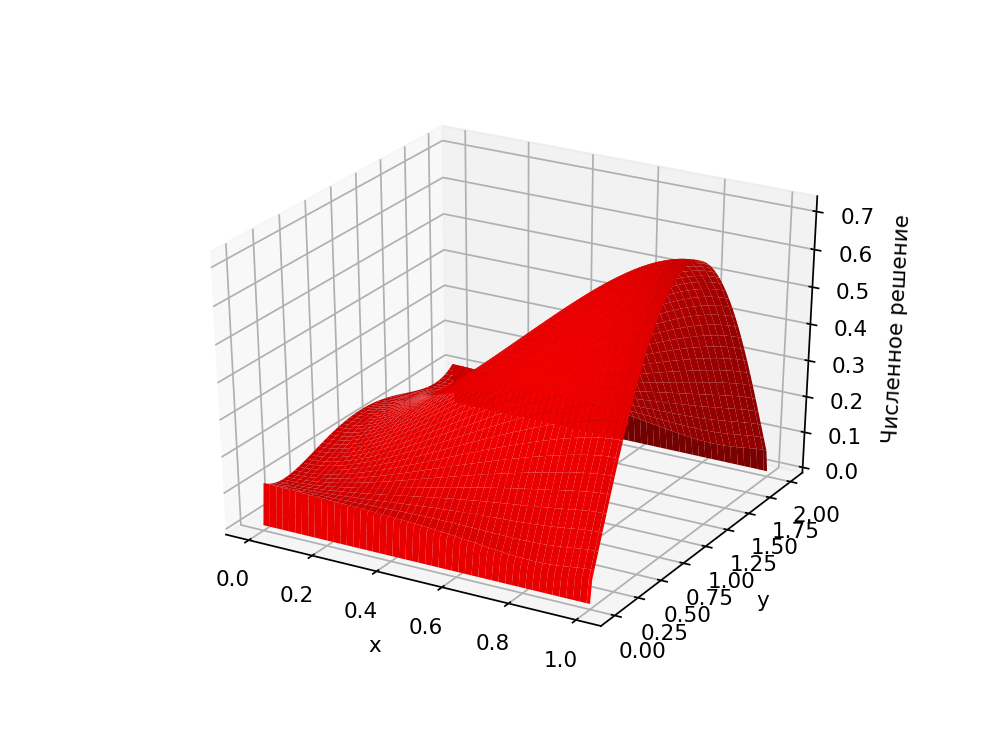

<IPython.core.display.Javascript object>


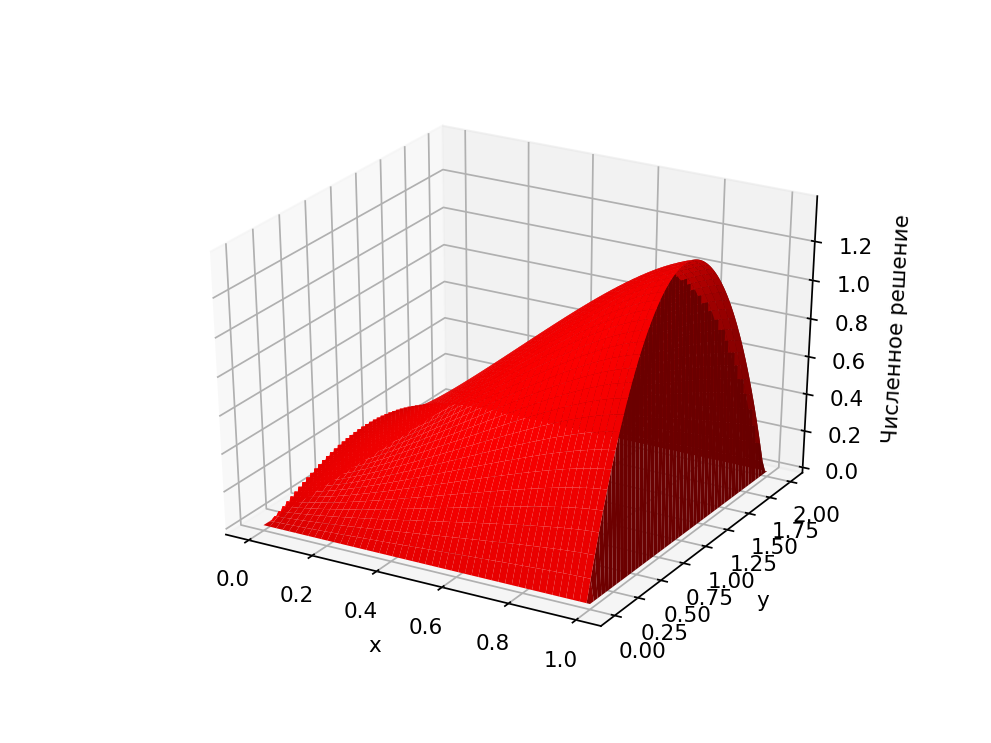

<IPython.core.display.Javascript object>


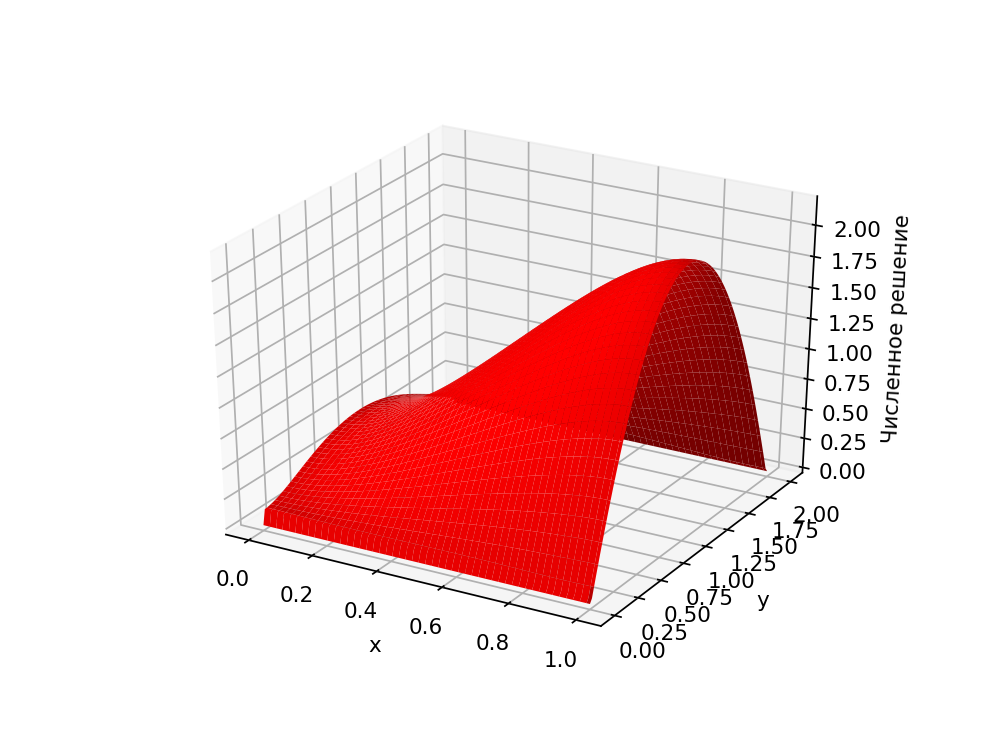

Text(0.5, 0, 'Численное решение')

In [244]:
from mpl_toolkits.mplot3d import Axes3D
time = 0
fig = plt.figure()
X,Y = np.meshgrid(x, y)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u[:,:,time], color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Численное решение')
from mpl_toolkits.mplot3d import Axes3D
time = 1
fig = plt.figure()
X,Y = np.meshgrid(x, y)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u[:,:,time], color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Численное решение')
from mpl_toolkits.mplot3d import Axes3D
time = 5
fig = plt.figure()
X,Y = np.meshgrid(x, y)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u[:,:,time], color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Численное решение')
from mpl_toolkits.mplot3d import Axes3D
time = 10
fig = plt.figure()
X,Y = np.meshgrid(x, y)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u[:,:,time], color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Численное решение')
from mpl_toolkits.mplot3d import Axes3D
time = 12
fig = plt.figure()
X,Y = np.meshgrid(x, y)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u[:,:,time], color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Численное решение')
from mpl_toolkits.mplot3d import Axes3D
time = 15
fig = plt.figure()
X,Y = np.meshgrid(x, y)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u[:,:,time], color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Численное решение')
from mpl_toolkits.mplot3d import Axes3D
time = 20
fig = plt.figure()
X,Y = np.meshgrid(x, y)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u[:,:,time], color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Численное решение')